In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-top-10000-popular-movies-dataset/TMDb_updated.CSV


In [2]:
df= pd.read_csv('/kaggle/input/tmdb-top-10000-popular-movies-dataset/TMDb_updated.CSV')

In [3]:
df.shape

(10000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   title              10000 non-null  object 
 2   overview           9970 non-null   object 
 3   original_language  10000 non-null  object 
 4   vote_count         10000 non-null  int64  
 5   vote_average       10000 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [5]:
df=df.dropna()

In [6]:
df.shape

(9970, 6)

In [7]:
df.head()

,Unnamed: 0,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [8]:
df.drop(columns='Unnamed: 0',inplace=True)

In [9]:
df.head()

,title,overview,original_language,vote_count,vote_average
0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [10]:
import seaborn as sns

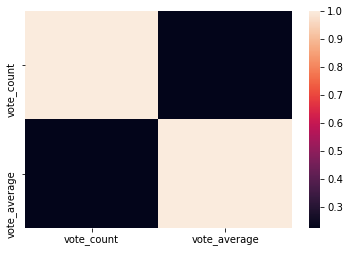

In [11]:
sns.heatmap(df.corr())

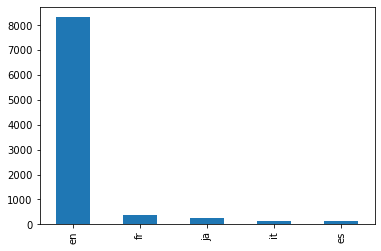

In [12]:
df['original_language'].value_counts().head(5).plot(kind='bar')

In [13]:
df1=df.groupby('original_language').sum()

In [14]:
df1[df1['vote_average']>200]

,vote_count,vote_average
original_language,,
cn,19704,485.6
da,11739,219.8
de,38101,665.2
en,9573348,51849.9
es,61669,954.3
fr,175383,2533.6
hi,13445,480.3
it,83298,1002.8
ja,109316,1869.3


In [15]:
df1

,vote_count,vote_average
original_language,,
ab,1,8.0
af,181,13.1
ar,870,37.4
bs,227,7.7
cn,19704,485.6
cs,473,29.7
da,11739,219.8
de,38101,665.2
el,1181,14.3


In [16]:
example_overview=df['overview'][0]

In [17]:
example_overview

'The near future, a time when both hope and hardships drive humanity to look to the stars and beyond. While a mysterious phenomenon menaces to destroy life on planet Earth, astronaut Roy McBride undertakes a mission across the immensity of space and its many perils to uncover the truth about a lost expedition that decades before boldly faced emptiness and silence in search of the unknown.'

In [18]:
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer  

In [19]:
texts= example_overview.split(' ')

In [20]:
text=[]
for i in texts:
    text.append(i.lower())

In [21]:
stopwords_english = stopwords.words('english') 

In [22]:
words=[]
for word in text: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        words.append(word)

print('removed stop words and punctuation:')
print(words)

removed stop words and punctuation:
['near', 'future,', 'time', 'hope', 'hardships', 'drive', 'humanity', 'look', 'stars', 'beyond.', 'mysterious', 'phenomenon', 'menaces', 'destroy', 'life', 'planet', 'earth,', 'astronaut', 'roy', 'mcbride', 'undertakes', 'mission', 'across', 'immensity', 'space', 'many', 'perils', 'uncover', 'truth', 'lost', 'expedition', 'decades', 'boldly', 'faced', 'emptiness', 'silence', 'search', 'unknown.']


In [23]:
# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
stem = [] 

for word in words:
    stem_word = stemmer.stem(word)  # stemming word
    stem.append(stem_word)  # append to the list

print('stemmed words:')
print(stem)

stemmed words:
['near', 'future,', 'time', 'hope', 'hardship', 'drive', 'human', 'look', 'star', 'beyond.', 'mysteri', 'phenomenon', 'menac', 'destroy', 'life', 'planet', 'earth,', 'astronaut', 'roy', 'mcbride', 'undertak', 'mission', 'across', 'immens', 'space', 'mani', 'peril', 'uncov', 'truth', 'lost', 'expedit', 'decad', 'boldli', 'face', 'empti', 'silenc', 'search', 'unknown.']
